In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
train_loss=[]
val_loss=[]

with open('log.txt') as f:
    lines = f.readlines()
    for line in lines:
        if 'Epoch' in line:
            t1 =line.index('Loss')
            t2 =line[t1+4:].index('(')
            train_loss.append(float(line[t1+4:][:t2]))
        else:
            t1 =line.index('Loss')
            t2 =line[t1+4:].index('(')
            val_loss.append(float(line[t1+4:][:t2]))

In [25]:
train_loss

[0.026065,
 0.030676,
 0.015005,
 0.013479,
 0.019046,
 0.01189,
 0.015909,
 0.011995,
 0.016529,
 0.011574,
 0.014242,
 0.014227,
 0.012508,
 0.01608,
 0.011051,
 0.012787,
 0.01265,
 0.015231,
 0.011953,
 0.009988,
 0.013842,
 0.018446,
 0.01193,
 0.013283,
 0.014337,
 0.013176,
 0.007758,
 0.013483,
 0.009157,
 0.011067,
 0.011267,
 0.01325,
 0.010976,
 0.013789,
 0.017601,
 0.00769,
 0.011979,
 0.013069,
 0.012218,
 0.013887,
 0.012457,
 0.007984,
 0.007796,
 0.013104,
 0.009711,
 0.010369,
 0.017115,
 0.008945,
 0.017885,
 0.011475,
 0.010279,
 0.010197,
 0.009911,
 0.009726,
 0.013924,
 0.011241,
 0.014764,
 0.008812,
 0.009682,
 0.008885,
 0.015825,
 0.007139,
 0.010086,
 0.007241,
 0.008834,
 0.009056,
 0.01075,
 0.012507,
 0.01052,
 0.011354,
 0.009545,
 0.008645,
 0.011808,
 0.010737,
 0.012118,
 0.009499,
 0.010028,
 0.007235,
 0.014309,
 0.007326,
 0.010457,
 0.007854,
 0.006553,
 0.008879,
 0.010897,
 0.01161,
 0.015309,
 0.008509,
 0.008368,
 0.010548,
 0.008163,
 0.00708

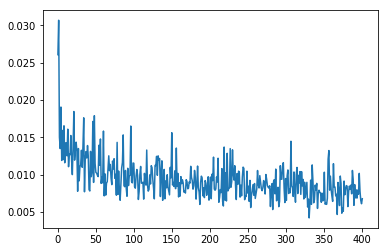

In [26]:
plt.plot(train_loss)
plt.savefig('train_loss_epoch22.png',bbox_inches='tight')

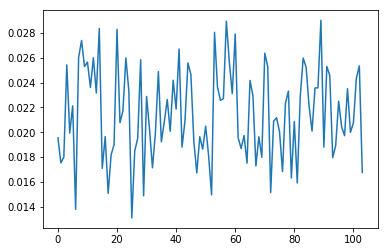

In [27]:
plt.plot(val_loss)
plt.savefig('val_loss_epoch22.png',bbox_inches='tight')

In [3]:
from our_nets import *
model_base=densenet161_noa_karen(verbose=True)

<bound method Module.modules of DenseNet161_Noa_Karen (
  (densenet): DenseNet (
    (features): Sequential (
      (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True)
      (relu0): ReLU (inplace)
      (pool0): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
      (denseblock1): _DenseBlock (
        (denselayer1): _DenseLayer (
          (norm.1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True)
          (relu.1): ReLU (inplace)
          (conv.1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm.2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True)
          (relu.2): ReLU (inplace)
          (conv.2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer (
          (norm.1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True)
          (relu.1

In [ ]:
model_base.parameters

In [9]:
from graphviz import Digraph
import re
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd import Variable
import torchvision.models as models


def make_dot(var):
    node_attr = dict(style='filled',
                     shape='box',
                     align='left',
                     fontsize='12',
                     ranksep='0.1',
                     height='0.2')
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()

    def add_nodes(var):
        if var not in seen:
            if isinstance(var, Variable):
                value = '('+(', ').join(['%d'% v for v in var.size()])+')'
                dot.node(str(id(var)), str(value), fillcolor='lightblue')
            else:
                dot.node(str(id(var)), str(type(var).__name__))
            seen.add(var)
            if hasattr(var, 'previous_functions'):
                for u in var.previous_functions:
                    dot.edge(str(id(u[0])), str(id(var)))
                    add_nodes(u[0])
    add_nodes(var.creator)
    return dot




ERROR: Line magic function `%graphviz` not found.


In [13]:
inputs = torch.randn(1,3,224,224)
#resnet18 = models.resnet18()
y = model_base(Variable(inputs))
# print(y)

g = make_dot(y)


In [15]:
g.view()

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'Digraph.gv'], make sure the Graphviz executables are on your systems' PATH